Project Overview: Employee Attrition Analysis & Prediction
1. Introduction
This project focuses on analyzing an HR Dataset to understand the factors that drive employee turnover (Attrition). The dataset contains comprehensive information about employees, including demographics, job roles, financial compensation, and satisfaction levels. The goal is to leverage data science techniques to provide actionable insights for HR departments to improve employee retention.

2. Project Objectives
The pipeline is structured into four main phases:
Data Cleaning & Preprocessing: * Handling missing values and removing redundant features (e.g., EmployeeCount, StandardHours).
Encoding categorical variables and feature scaling for optimal model performance.
Exploratory Data Analysis (EDA):
Quantifying the overall Attrition Rate.
Analyzing attrition distribution across Age Groups to identify vulnerable demographics.
Examining the relationship between Monthly Income levels and the likelihood of resignation.
Statistical Insights:
Extracting key metrics and correlations between job satisfaction, work-life balance, and turnover.
Predictive Modeling:
Building and training a Binary Classification Model (e.g., Random Forest or XGBoost) to predict whether an employee will leave or stay.
Evaluating the model using Precision, Recall, and F1-Score to ensure reliability.
3. Key Tech Stack
Data Handling: Pandas, NumPy.
Visualization: Matplotlib, Seaborn.
Machine Learning: Scikit-learn.

In [1]:
# First begin with EDA to understand what the dataset is 
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

import pandas as pd

data = pd.read_csv(r"C:\Users\USER\Desktop\employees data.csv")
pd.set_option('display.max_columns', None)
data.drop(data.columns[0], axis=1, inplace=True)
print (data.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  

In [2]:
print (data.columns.tolist())

['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


I will remove the following columns because they are considered unnecessary and can be dispensed with; I will only use the monthly income column.

In [3]:
data = data.drop(['Over18','MonthlyRate','HourlyRate','DailyRate','EmployeeCount'], axis=1)

In [4]:
print(data.head())

   Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   41       Yes      Travel_Rarely                   Sales                 1   
1   49        No  Travel_Frequently  Research & Development                 8   
2   37       Yes      Travel_Rarely  Research & Development                 2   
3   33        No  Travel_Frequently  Research & Development                 3   
4   27        No      Travel_Rarely  Research & Development                 2   

   Education EducationField  EmployeeNumber  EnvironmentSatisfaction  Gender  \
0          2  Life Sciences               1                        2  Female   
1          1  Life Sciences               2                        3    Male   
2          2          Other               4                        4    Male   
3          4  Life Sciences               5                        4  Female   
4          1        Medical               7                        1    Male   

   JobInvolvement  JobLevel     

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeNumber            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [6]:
print (data.dtypes.value_counts())

int64     21
object     8
Name: count, dtype: int64


Check the missing values

In [7]:
for col in data.columns:
    print (data[col].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


Check the outliers with boxplot

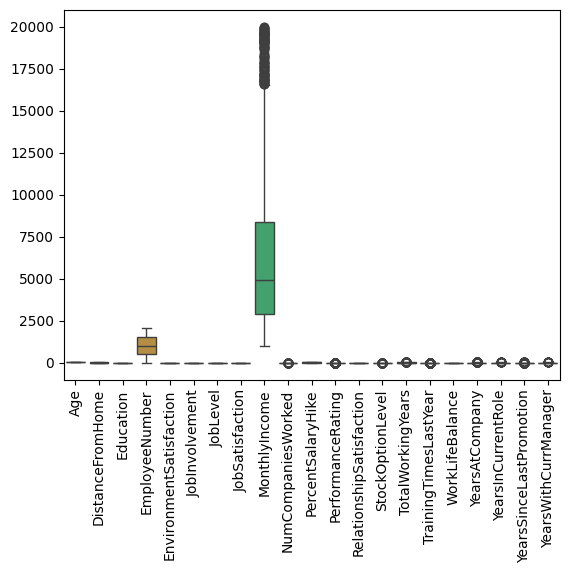

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data)
plt.xticks(rotation=90)
plt.show()

In [9]:
print (data['MonthlyIncome'].skew())

1.3698166808390662


The monthly income column showed outliers and significant deviations, so I will apply a logarithmic transformation to it to reduce the impact of variance on the model's future performance.

In [10]:
import numpy as np
data['MonthlyIncome'] = np.log1p(data['MonthlyIncome'])
print(data['MonthlyIncome'].skew())

0.2864483763069351




We observe a significant change in the amount of variance, and this is the goal.

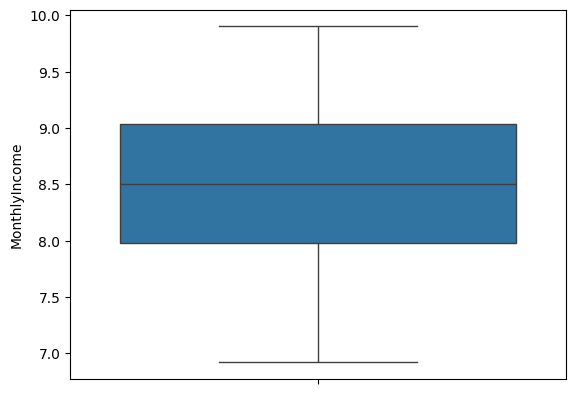

In [11]:
sns.boxplot(data['MonthlyIncome'])
plt.xticks(rotation=90)
plt.show()

The extreme values ​​were also compressed and brought within a reasonable range.

In [12]:
print (data.shape[0])

1470


---

Now, the statistical analysis phase.

---

At this stage, I will display a histogram and a pie chart to show the number of employees who left their jobs according to age group, monthly salary, and their percentage of the total number of those who left.

total left eployees 237 from 1470


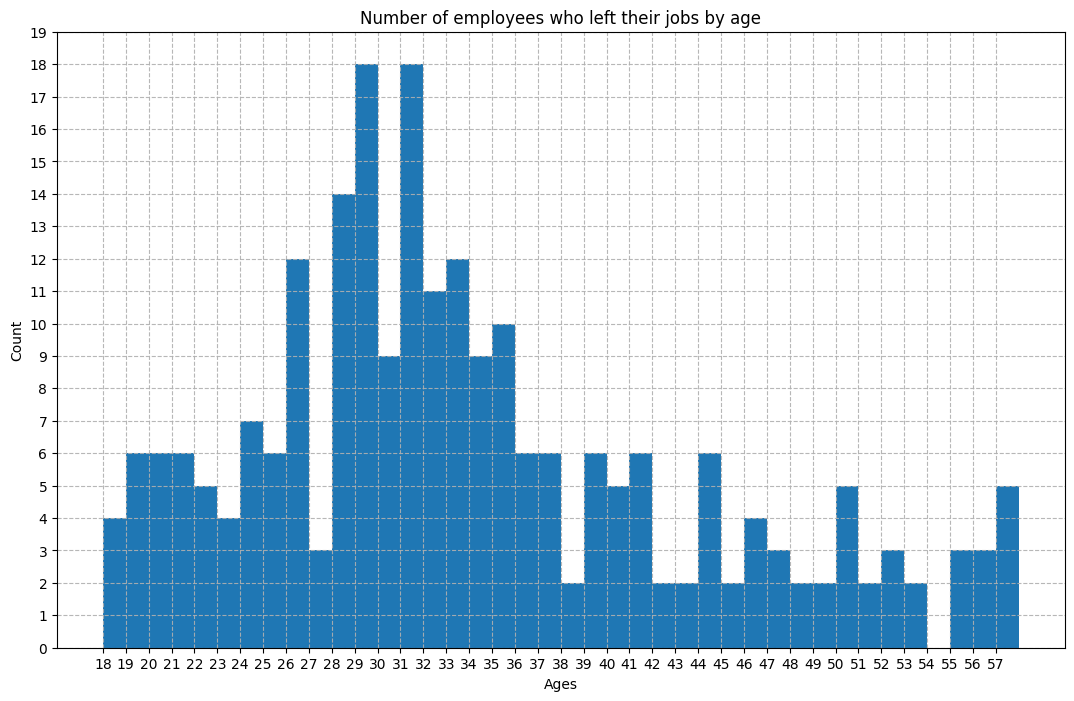

In [13]:
left_employee = data[data['Attrition']=='Yes']
print (f'total left eployees {left_employee.shape[0]} from {data.shape[0]}')
fig, ax = plt.subplots(figsize=(13,8))
ax.hist(left_employee['Age'], bins=40)
ax.set_xticks(range(left_employee['Age'].min(), left_employee['Age'].max(), 1))
ax.set_yticks(range(0,20,+1))
ax.grid(ls='--', alpha=0.9)
plt.title('Number of employees who left their jobs by age')
plt.xlabel('Ages')
plt.ylabel('Count')
plt.show()

This image shows the number of departures for each age group and is important for predicting employee turnover rates based on their age.

In [14]:
left_count = left_employee['Age'].value_counts().sort_values(ascending=False)[:5]
print (left_count)

Age
31    18
29    18
28    14
33    12
26    12
Name: count, dtype: int64


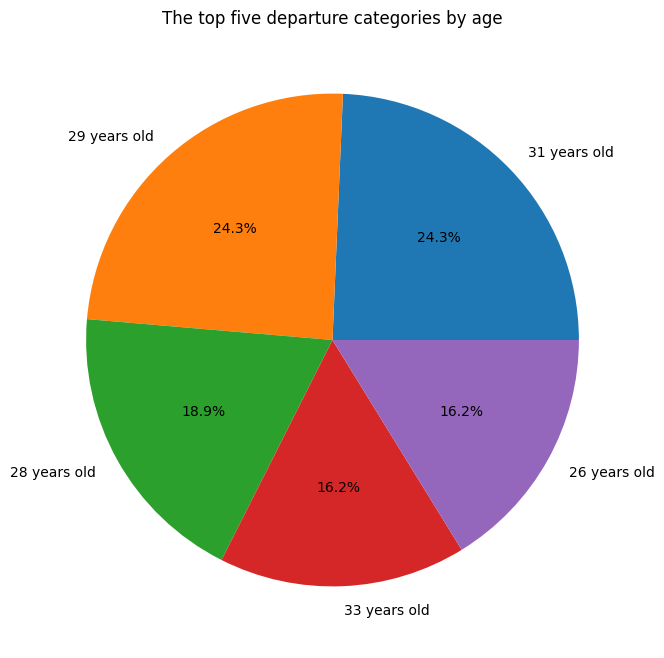

In [15]:
plt.figure(figsize=(8,8))
index = []
for idx in left_count.index:
    idx = f'{idx} years old'
    index.append(idx)
plt.pie(left_count, labels=index, autopct='%1.1f%%')
plt.title('The top five departure categories by age')
plt.show()

This pie chart displays the five age groups with the highest departure rates. The percentages do not represent the percentage of each group as a whole, but rather the percentage of each of the five groups. This chart is another type of analytical graph that can be used to determine percentages instead of calculating them manually in certain cases.

In [16]:
print (data['MonthlyIncome'].min())
print (data['MonthlyIncome'].max())

6.917705609835305
9.903487552536127


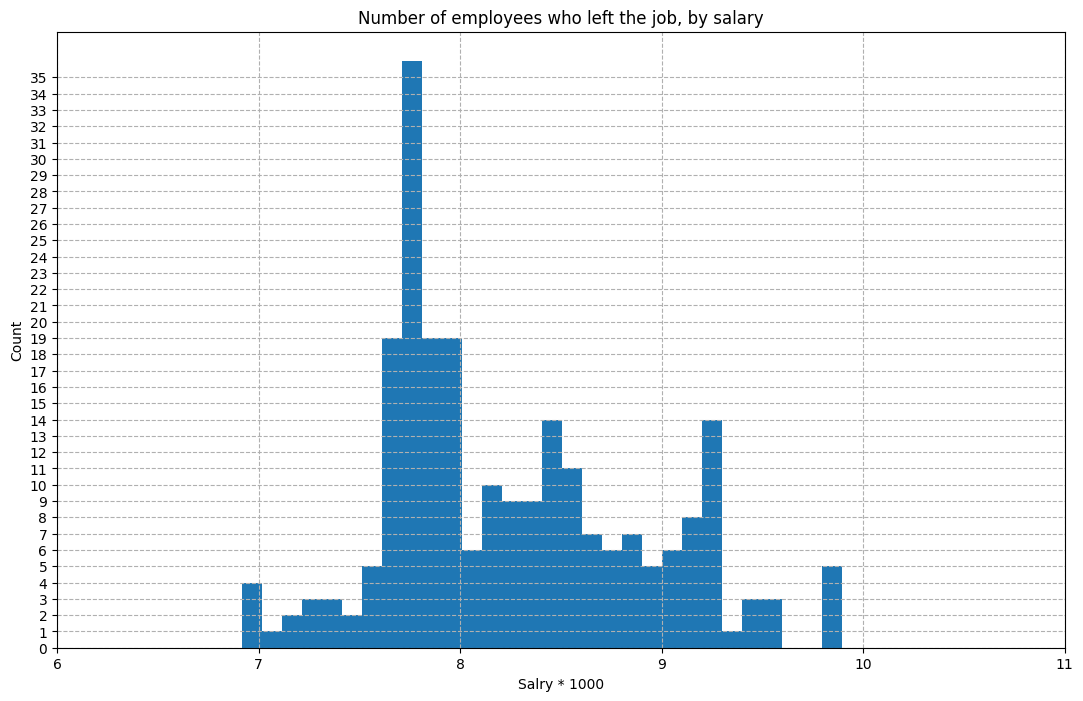

In [17]:
fig ,ax = plt.subplots(figsize=(13,8))
ax.hist(left_employee['MonthlyIncome'] , bins=30)
ax.set_xticks(range(int(left_employee['MonthlyIncome'].min()), int(left_employee['MonthlyIncome'].max()+3)))
ax.set_yticks(range(0,36,1))
plt.grid(ls='--')
plt.title('Number of employees who left the job, by salary')
plt.xlabel('Salry * 1000')
plt.ylabel('Count')
plt.show()

In [18]:
most_left = left_employee['MonthlyIncome'].value_counts().sort_values(ascending=False).iloc[:5]
print (most_left.index)

Index([8.584290934948731, 7.767687277186908, 7.785305182539862,
       7.738052297689316, 7.895063498091573],
      dtype='float64', name='MonthlyIncome')


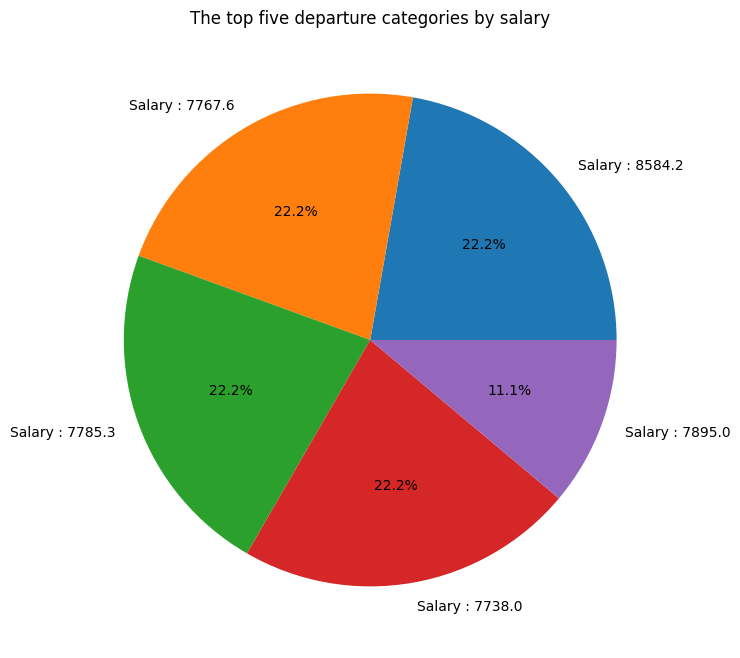

In [19]:
labels = []
for lab in most_left.index:
    lab = f'Salary : {lab*1000}'
    labels.append(lab[:15])
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(most_left, labels=labels, autopct='%1.1f%%')
plt.title('The top five departure categories by salary')
plt.show()

---

The statistical analysis is complete, and now I will build a classification model and train it on the data. I will choose K-nearest-neighbors model because of the small dataset and also because this model is simple and easy to interpret I will compare it to stronger models such as random forests, then choose the best model based on its ability to classify correctly.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier


x = [col for col in data.columns if col != 'Attrition']
y = 'Attrition'

print(data['Attrition'].value_counts())
data['Attrition'] = (data['Attrition'] == 'Yes').astype(int)

x_train, x_test, y_train, y_test = train_test_split(
    data[x], 
    data[y], 
    test_size=0.2, 
    stratify=data[y], 
    random_state=42
)

print('Training data after the split')
print(y_train.value_counts())

Attrition
No     1233
Yes     237
Name: count, dtype: int64
Training data after the split
Attrition
0    986
1    190
Name: count, dtype: int64


Here I will convert the data into the standard format for machine learning models according to the column types.

In [21]:
scaler = StandardScaler()
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, data[x].select_dtypes(include=np.number).columns),
        ('object', encoder, data.select_dtypes(exclude=np.number).columns)
    ]
)

x_train_scaled = preprocessor.fit_transform(x_train)
x_test_scaled = preprocessor.transform(x_test)


Now I will import the KNN model and adjust its parameters using randomized search CV to ensure accurate results. Then I will train it on the data and evaluate its performance on the test data.

In [22]:
from scipy.stats import randint, uniform
knn = KNeighborsClassifier()

param_dist = {
    'n_neighbors': randint(1, 30),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': randint(1, 5),
    'leaf_size': randint(10, 50)
}

random_search = RandomizedSearchCV(
    knn,
    param_distributions=param_dist,
    n_iter=20,              
    cv=5,                   
    random_state=42,
    n_jobs=-1              
)

random_search.fit(x_train_scaled, y_train)
model = random_search.best_estimator_
y_pred = model.predict(x_test_scaled)

In [31]:
print (recall_score(y_test, y_pred, pos_label=1))
print (recall_score(y_test, y_pred, pos_label=0))

0.0851063829787234
0.979757085020243


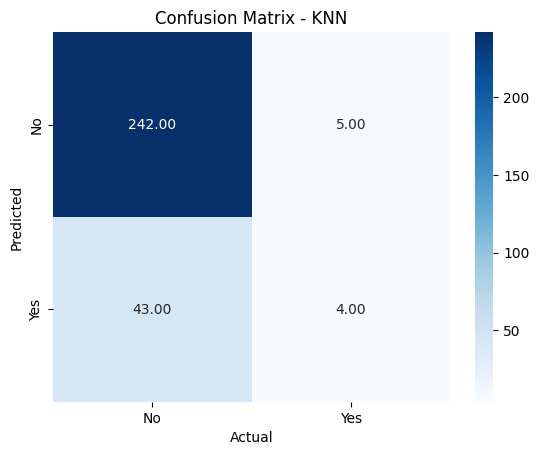

In [33]:
sns.heatmap(
    confusion_matrix(y_test, y_pred), 
     annot=True, cmap='Blues', 
     fmt='.2f', xticklabels=['No','Yes'], 
     yticklabels=['No','Yes']
)
plt.title('Confusion Matrix - KNN')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

This confusion matrix displays a comparison between the percentage of employees who actually left and those who did not leave versus those predicted by the model, and it represents a visual representation of the recall_score.

In [28]:
print("Data balance in Train set:")
print(y_train.value_counts())
print("\nData balance in Test set:")
print(y_test.value_counts())

Data balance in Train set:
Attrition
0    986
1    190
Name: count, dtype: int64

Data balance in Test set:
Attrition
0    247
1     47
Name: count, dtype: int64


It seems the model misunderstood the relationship and saved data instead of identifying the pattern. Its accuracy in detecting employees who stayed was very high, but it could barely distinguish those who left. Therefore, its performance is considered poor. I will try the random forest model and compare its performance.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced',  
    random_state=42,
    n_jobs=-1
)

rf_model.fit(x_train_scaled, y_train)
y_pred_rf = rf_model.predict(x_test_scaled)

print(f"\nRecall Score (Class 1): {recall_score(y_test, y_pred_rf, pos_label=1):.3f}")
print(f"Recall Score (Class 0): {recall_score(y_test, y_pred_rf, pos_label=0):.3f}")
print(f"F1 Score (Class 1): {f1_score(y_test, y_pred_rf, pos_label=1):.3f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")


Recall Score (Class 1): 0.426
Recall Score (Class 0): 0.923
F1 Score (Class 1): 0.465
Accuracy: 0.844


It is clear that the model understood the pattern very well and performed much better than the previous model, even though the recall_score for employees who left was low. This is due to their low number, so even if the pattern was not very clear, the model was able to learn it very well. This means that it is the appropriate model for this data and can be used to classify similar data.

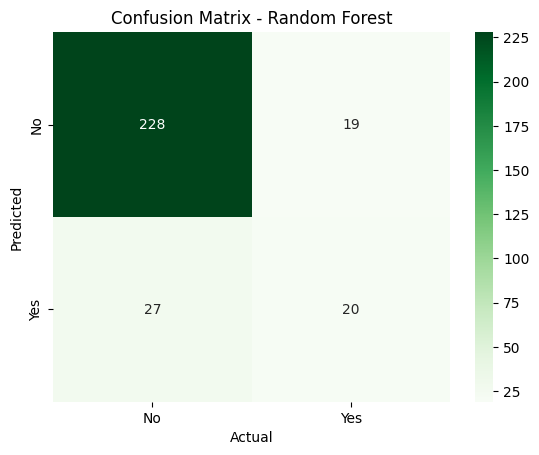

In [30]:
sns.heatmap(
    confusion_matrix(y_test, y_pred_rf), 
     annot=True, cmap='Greens', 
     fmt='d', xticklabels=['No','Yes'], 
     yticklabels=['No','Yes']
)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix - Random Forest')
plt.show()

The model has now been trained and is fully ready for use on similar datasets.

*** ENG MOHAMMAD ***